In [ ]:
%matplotlib inline

import numpy as np # linear algebra
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


import torch
import torch.optim as optim


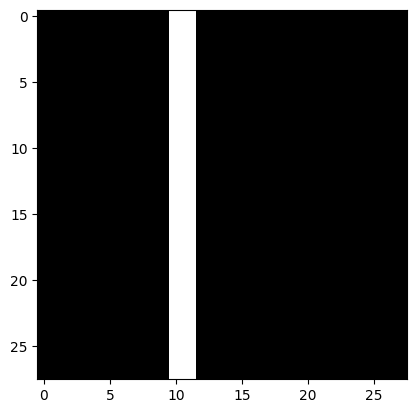

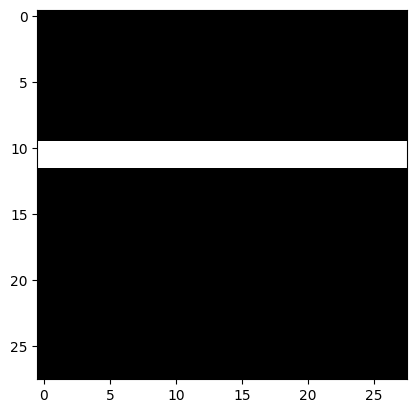

In [ ]:
# let's first generate input image

def get_vertical_image():
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,10:12] = 1
  return image_vertical


def get_horizontal_image():
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[10:12,:] = 1
  return image_horizontal


plt.imshow(get_vertical_image())
plt.show()

plt.imshow(get_horizontal_image())
plt.show()

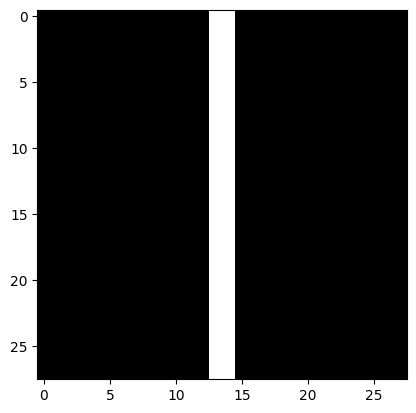

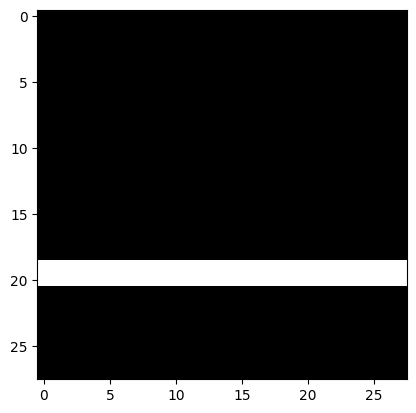

In [ ]:
# but lets make it to have "random location"
def get_vertical_image():
  random_value = np.random.randint(0, 27)
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,random_value:random_value+2] = 1  # Change me!
  return image_vertical


def get_horizontal_image():
  random_value = np.random.randint(0, 27) # the random value will be frome 0~26
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[random_value:random_value+2,:] = 1 # Change me!
  return image_horizontal


plt.imshow(get_vertical_image())
plt.show()

plt.imshow(get_horizontal_image())
plt.show()

In [ ]:
get_horizontal_image().shape

(28, 28, 3)

In [ ]:
# how ever, in machine learning, we often input multiple images at once. So the input is actually multiple images!
# Thus, pytorch prefers first dimension of the input to be "number of images". We can do this by

def get_vertical_image():
  random_value = np.random.randint(0, 27)
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,random_value:random_value+2] = 1
  image_vertical = image_vertical.reshape(1,28,28,3)
  return image_vertical


def get_horizontal_image():
  random_value = np.random.randint(0, 27)
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[random_value:random_value+2,:] = 1
  image_horizontal = image_horizontal.reshape(1,28,28,3)
  return image_horizontal


print(get_horizontal_image().shape, get_vertical_image().shape)

(1, 28, 28, 3) (1, 28, 28, 3)


In [ ]:
def get_vertical_image():
  random_value = np.random.randint(0, 27)
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,random_value:random_value+2] = 1
  image_vertical = image_vertical.reshape(1,28,28,3)
  image_vertical = image_vertical.transpose(0,3,1,2)
  return image_vertical


def get_horizontal_image():
  random_value = np.random.randint(0, 27) # the random value will be frome 0~26
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[random_value:random_value+2,:] = 1
  image_horizontal = image_horizontal.reshape(1,28,28,3)
  image_horizontal = image_horizontal.transpose(0,3,1,2)
  return image_horizontal


print(get_horizontal_image().shape, get_vertical_image().shape)

(1, 3, 28, 28) (1, 3, 28, 28)


In [ ]:
# now we want to change the input to something that pytorch can use

def get_vertical_image():
  random_value = np.random.randint(0, 27)
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,random_value:random_value+2] = 1
  image_vertical = image_vertical.reshape(1,28,28,3)
  image_vertical = image_vertical.transpose(0,3,1,2)
  image_vertical = torch.Tensor(image_vertical)
  return image_vertical


def get_horizontal_image():
  random_value = np.random.randint(0, 27) # the random value will be frome 0~26
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[random_value:random_value+2,:] = 1
  image_horizontal = image_horizontal.reshape(1,28,28,3)
  image_horizontal = image_horizontal.transpose(0,3,1,2)
  image_horizontal = torch.Tensor(image_horizontal)
  return image_horizontal


print(get_horizontal_image().shape, get_vertical_image().shape)

torch.Size([1, 3, 28, 28]) torch.Size([1, 3, 28, 28])


In [ ]:
# now, lets send this data to GPU memory.

def get_vertical_image():
  random_value = np.random.randint(0, 27)
  image_vertical = np.zeros([28,28,3])
  image_vertical[:,random_value:random_value+2] = 1
  image_vertical = image_vertical.reshape(1,28,28,3)
  image_vertical = image_vertical.transpose(0,3,1,2)
  image_vertical = torch.Tensor(image_vertical)
  return image_vertical


def get_horizontal_image():
  random_value = np.random.randint(0, 27) # the random value will be frome 0~26
  image_horizontal = np.zeros([28,28,3])
  image_horizontal[random_value:random_value+2,:] = 1
  image_horizontal = image_horizontal.reshape(1,28,28,3)
  image_horizontal = image_horizontal.transpose(0,3,1,2)
  image_horizontal = torch.Tensor(image_horizontal)
  return image_horizontal

print(get_horizontal_image().shape, get_vertical_image().shape)

torch.Size([1, 3, 28, 28]) torch.Size([1, 3, 28, 28])


In [ ]:
# we first generate a convolutional neural network.
first_layer = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3))

# now, lets send the CNN layer to GPU memory
first_layer = first_layer

# Lets check the kernel weights!
first_layer.weight.shape

torch.Size([16, 3, 3, 3])

In [ ]:
# what will happen if we feed the image to the CNN layer we made?

image_vertical = get_vertical_image()
output = first_layer(image_vertical)
output.shape

torch.Size([1, 16, 26, 26])

In [ ]:
# but the output size is not what we wanted

first_layer = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), padding='same', )
first_layer = first_layer
output = first_layer(image_vertical)
output.shape

torch.Size([1, 16, 28, 28])

In [ ]:
maxpool_layer = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)
print(output.shape)
output2 = maxpool_layer(output)
print(output2.shape)

torch.Size([1, 16, 28, 28])
torch.Size([1, 16, 14, 14])


In [ ]:
print(output[0,0,:4,:4])

tensor([[-0.1922, -0.1922, -0.1922, -0.1922],
        [-0.1922, -0.1922, -0.1922, -0.1922],
        [-0.1922, -0.1922, -0.1922, -0.1922],
        [-0.1922, -0.1922, -0.1922, -0.1922]], grad_fn=<SliceBackward0>)


## Fun asides: A Convolution Challenge

Here's a fun challenge question from a Princeton undergrad ML course to try. Only do this if you're interesting in challenging yourself! (Credit to COS 485 for question idea)

### Background
First we will create a single layer convolutional net that detects the following pattern in binary images.\
(When detecting this pattern, it doesn't matter what the input is outside the $4\times 4$ block.)

In [ ]:
# Just a helper function for visualization
def montage(imgstack):
    nimg = imgstack.size(dim = 0)
    width = int(np.ceil(np.sqrt(nimg)))   # compute a roughly square layout for the panels
    height = int(np.ceil(nimg / width))
    for i in range(nimg):
        ax = plt.subplot(height, width, i+1)
        plt.matshow(imgstack[i], fignum = False)    # Having to remember fignum can be disadvantage of matshow
        plt.axis('off')

In [ ]:
trigger = torch.tensor([
   [1, 1, 1, 1],
   [1, 0, 0, 1],
   [1, 0, 0, 1],
   [1, 1, 1, 1]
]).float()

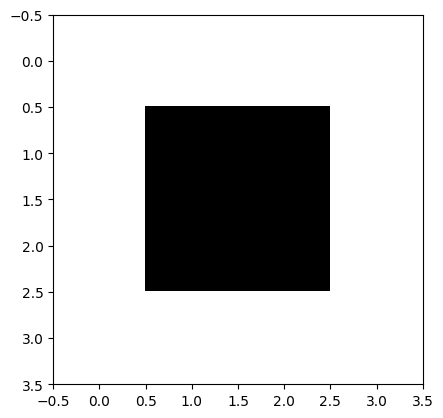

In [ ]:
plt.imshow(trigger, cmap='gray')

Here are two test images. The right image has the trigger pattern inserted.\
The left image is the same, but the trigger pattern has been corrupted by filling it in.

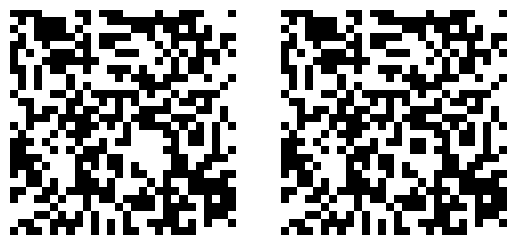

In [ ]:
torch.manual_seed(485)
testimages = torch.zeros(2, 28, 28)
testimages[1] = (torch.rand(28, 28) > 0.5).float()
testimages[1, 15:19, 15:19] = trigger
testimages[0, :, :] = testimages[1, :, :]
testimages[0, 16:18, 16:18] = 1
montage(testimages)

Next what we are going to do is design a convolution to detect this pattern. This will look something like of the form
$$ \begin{cases} \text{detected if    } Wx + b >= 0 \\
  \text{not detected if } Wx + b < 0
  \end{cases}$$
  where $Wx + b$ is applying our convolution followed by the bias, which essentially thresholds our computation to give us a yes/no decision.

Here is the convolutional layer (without the nonlinear activation)

In [ ]:
from torch import nn

w = torch.tensor([
   [1, 1, 1, 1],
   [1, -1, -1, 1],
   [1, -1, -1, 1],
   [1, 1, 1, 1]
]).float()
single = nn.Conv2d(1, 1, 4)
single.weight = nn.Parameter(w[None, None])
single.bias = nn.Parameter(torch.tensor([-11.5]))
single.requires_grad_(False)

Conv2d(1, 1, kernel_size=(4, 4), stride=(1, 1))

We apply the convolutional layer and threshold the result using our bias. \
In the left image, all neurons are silent because the trigger pattern is not present in the test image.\
In the right image, only the correct neuron was triggered by the pattern.

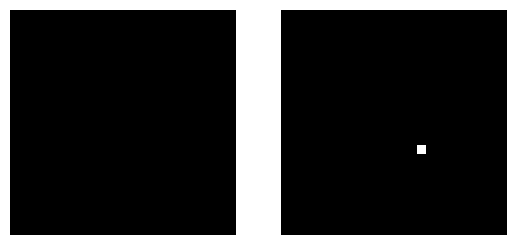

In [ ]:
binaryoutput = single(testimages[:, None, :, :]) > 0
montage(binaryoutput.squeeze())

### Challenge

Design a convolutional net that performs the same computation.\
Here's the catch: you are allowed to use only kernels up to $3\times 3$ but no larger.\
You can assume that all images are binary.

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 4, 3, padding='same'),
    nn.ReLU(),
    nn.Conv2d(4, 1, 3, padding='same')
    #nn.Conv2d(1, 1, 3, padding='same')
)

w_final = torch.tensor ([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).float()
w1 = torch.tensor([
    [-1, -1, 1],
    [-1, -1, 1],
    [1, 1, 1]
]).float()
w2 = torch.tensor([
    [1, 1, 1],
    [1, -1, -1],
    [1, -1, -1]
]).float()
w3 = torch.tensor([
    [1, -1, -1],
    [1, -1, -1],
    [1, 1, 1]
]).float()
w4 = torch.tensor([
    [1, 1, 1],
    [-1, -1, 1],
    [-1, -1, 1]
]).float()
model.requires_grad_(False)

print(model[0].weight.shape)
model[0].weight[0,0] = nn.Parameter(w1[None, None])
model[0].weight[1,0] = nn.Parameter(w2[None, None])
model[0].weight[2,0] = nn.Parameter(w3[None, None])
model[0].weight[3,0] = nn.Parameter(w4[None, None])


model[2].weight[0,0] = nn.Parameter(w_final[None, None])
model[2].weight[0,1] = nn.Parameter(w_final[None, None])
model[2].weight[0,2] = nn.Parameter(w_final[None, None])
model[2].weight[0,3] = nn.Parameter(w_final[None, None])


model[0].bias[0] = nn.Parameter(torch.tensor([-4.5]))
model[0].bias[1] = nn.Parameter(torch.tensor([-4.5]))
model[0].bias[2] = nn.Parameter(torch.tensor([-4.5]))
model[0].bias[3] = nn.Parameter(torch.tensor([-4.5]))
model[2].bias[0] = nn.Parameter(torch.tensor([-1.5]))


# ## requires idk



torch.Size([4, 1, 3, 3])


In [ ]:
model[2].bias.shape

torch.Size([1])

In [ ]:
model

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=same)
)

Show output on the test images

torch.Size([2, 1, 28, 28])


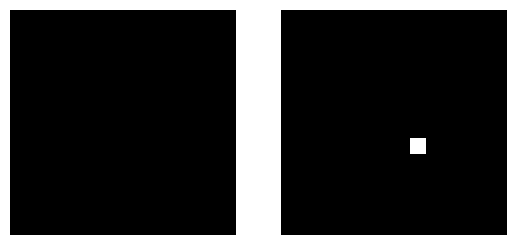

In [ ]:
output = model(testimages[:, None, :, :])
binaryoutput = output > 0
print(binaryoutput.shape)
montage(binaryoutput.squeeze().detach())

In [ ]:
output.shape

torch.Size([2, 1, 28, 28])

## Back to the notebook

![img](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

Now, Let's try to make the neural network above!

$$
n1 = 16
$$

$$
 n2 = 64
$$

$$
n3 = 4\times 4\times n2 = 1024
$$


In [ ]:
# we first declare every layer that requires "weights".
# Technically, maxpooling dont have weights, so

first_layer = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(5,5), padding='valid')
second_layer = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)
third_layer = torch.nn.Conv2d(in_channels=16, out_channels=64, kernel_size=(5,5), padding='valid')
fourth_layer = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)
fifth_layer = torch.nn.Linear(in_features=1024, out_features=64)
last_layer = torch.nn.Linear(in_features=64, out_features=1)


######### write your forward direction here ####################

def forward(input):

  # Run the first four layers, i.e. Conv2d and MaxPool2d stages
  output = first_layer(input)
  output = second_layer(output)
  output = third_layer(output)
  output = fourth_layer(output)

  # Reshape the input from a 2D array to a 1D vector
  output = output.reshape((1,1024))

  # Pass the 1D vector through final two linear layers for classifications
  output = fifth_layer(output)
  output = last_layer(output)

  return output
image_horizontal = get_horizontal_image()
output = forward(image_horizontal)
print(output.shape)

torch.Size([1, 1])


In [ ]:
# optimizer defines "How to update model weights, given update rules".
# as this is out of the scope. we won't cover it.

parameters = list(first_layer.parameters()) + list(third_layer.parameters()) + list(fifth_layer.parameters()) + list(last_layer.parameters())
optimizer = optim.SGD(parameters, lr=0.001)

In [ ]:
losses = []
for i in range(200):
  if i % 2 == 0:
    input = get_horizontal_image()
    label = 0
  else:
    input = get_vertical_image()
    label = 1

  output = forward(input)

  loss = (output - label)**2

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if i % 2 == 1:
    print((losses[0] + losses[1])/2)
    losses = []

0.5956558329053223
0.5535988472402096
0.6119139795191586
0.5872024942655116
0.5641526516410522
0.547090308740735
0.5766647588461637
0.5430412309942767
0.5177965347247664
0.4955373081029393
0.4669316780054942
0.5093178376118885
0.45972363592591137
0.43000747640326153
0.4348345813777996
0.4860152460169047
0.4145749848103151
0.3859396592306439
0.49277592985890806
0.47043101768940687
0.48275791201740503
0.487127841101028
0.37471075262874365
0.46328580053523183
0.4766216739953961
0.4639438704471104
0.41361190006136894
0.45331913605332375
0.33960055373609066
0.32642207760363817
0.3883664100430906
0.42915023141540587
0.4058140288107097
0.4328740183264017
0.38680859841406345
0.4585636928677559
0.308761821128428
0.4344685906544328
0.38062427937984467
0.2971322312951088
0.3996367543004453
0.36993518844246864
0.3812187872827053
0.4044642336666584
0.3275253353640437
0.38050680980086327
0.40151244262233377
0.43924424797296524
0.2748499736189842
0.24468211270868778
0.3705548206344247
0.4417522475123

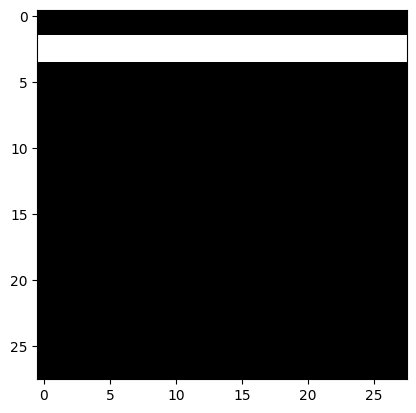

model output is  tensor([[0.2932]], grad_fn=<AddmmBackward0>)


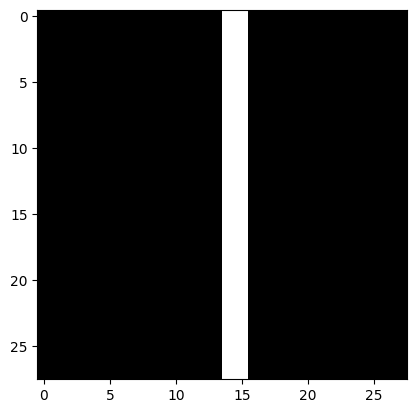

model output is  tensor([[0.5788]], grad_fn=<AddmmBackward0>)


In [ ]:
# Testing!

input = get_horizontal_image()
plt.imshow(input[0,0].cpu().numpy())
plt.show()
print("model output is ", forward(input))


input = get_vertical_image()
plt.imshow(input[0,0].cpu().numpy())
plt.show()
print("model output is ", forward(input))